In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
a = tf.constant(2)
a

In [ ]:
# rank 확인
print(tf.rank(a))

In [ ]:
# numpy로 변경힐때
a.numpy()

## OR 게이트

In [ ]:
import tensorflow as tf
import numpy as np
# 모델생성, 모델 어케 구현할건지
from tensorflow.keras.models import Sequential
# 신경망 구성
from tensorflow.keras.layers import Dense
# 최적화 함수 (경사하강법하는데 어떤식으로 해야 더 효율적인지), 선택적 경사하강법 => 요즘은 다 adam 쓴다
from tensorflow.keras.optimizers import SGD
# 손실함수
from tensorflow.keras.losses import mse

In [ ]:
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

In [ ]:
model = Sequential()

In [ ]:
# 신경망 구성 x,y가 들어가서 아웃풋으로 하나가 들어오고 인풋(feture값)은 두개가 들어가고 활성화함수는 linear
model.add(Dense(1,input_shape = (2,), activation = 'linear'))
# 모델 학습 시킬때 필요한 평가 설정
model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
# 모델 학습 epochs 는 학습을 몇번 시킬건지
model.fit(x,y,epochs = 500)

In [ ]:
model.predict([[0,0]])

## XOR 게이트
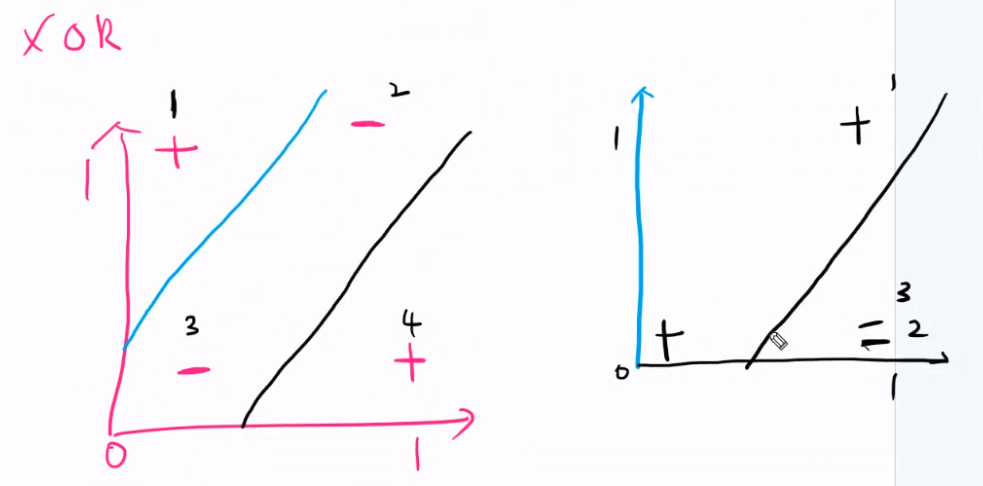


In [ ]:
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])

####  시그모이드는 순전파를 거치고 역전파에 의해 미분이 될때 기울기 소실 문제가 발생 -> relu는 미분을 해도 1로 되기때문에 기울기소실 문제 해결 

In [ ]:
model = Sequential()

# 노드가 30개가 생긴다. 레이어 추가, 활성화함수는 relu 
model.add(Dense(30,input_shape = (2,), activation = 'relu'))

# 출력층, 활성화함수는 sigmoid
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = SGD(), loss = mse, metrics = ['acc'])
model.fit(x,y,epochs = 500)

In [ ]:
model.predict([[0,0]])

## Mnist 데이터 셋 (손글씨)

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

In [ ]:
load_data(path = 'mnist.npz')

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data(path = 'mnist.npz')

In [ ]:
X_train.shape
## 첫번째 행 : 데이터가 6만개가 있다. 두~세번째 행 : 그 이미지의 size는 28x28 이다. 

In [ ]:
X_test.shape

In [ ]:
import matplotlib.pyplot as plt

sample_size = 3

random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
    img = X_train[idx, : ]
    # 정답값
    label = y_train[idx]
    print(label)
    plt.figure()
    plt.imshow(img)
    

#### 위와 같은 데이터를 인풋에 넣을떈1차원리스트로 변경해서 넣어준다.

In [ ]:
# 이 데이터를 (60000, 784)로 바꿔야한다. (60000, 28*28)
X_train.shape
# reshape에 -1을 넣으면 알아서 계산해서 맞춰준다.
X_train = X_train.reshape(-1,28*28)

In [ ]:
X_train.shape

In [ ]:
X_train[0]

In [ ]:
y_train[0]

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

In [ ]:
model = Sequential()

model.add(Dense(64, input_shape = (784,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
# 0~9까지 다 확인해야하기 때문에 최종 출력값 10개로
model.add(Dense(10, activation = 'softmax'))

# 다중 분류는 loss를 categorical_crossentropy 사용
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# 데이터가 6만개이면 배치사이즈로 100개면 백개씩 묶어서 학습 시킨다.
history = model.fit(X_train, y_train, epochs = 50, batch_size = 128)

In [ ]:
X_test = X_test.reshape(-1, 28*28)
# 이 10개 중에 가장 큰 값 중 정답이다.
model.predict(X_test)

In [ ]:
# 모델을 학습 시킬때 인풋값을 그대로 갖다가 pred에도 적용해서 써야된다.

pred = model.predict(X_test)

In [ ]:
pred.argmax(axis = 1)

In [ ]:
pred[0] # 10개의 아웃풋

In [ ]:
np.argmax(pred[0]) # 7번째 인덱스가 가장 높은 정확도?가 나온다.

In [ ]:
model.predict(X_test[0].reshape(-1,784)) 
# X_test의 0번째 인덱스를 predict하려면 2차원으로 넣어줘야한다.(reshape로 앞에는 아무거나 넣어주고 뒤에는 784로 맞추어차원을하나 추가해준다.) 
# X_train의 차원이랑 같아야한다.

In [ ]:
# 학습률 그래프 (학습이 잘 이루어졌는지 아닌지)
history.history

In [ ]:
# 학습률 그래프 (학습이 잘 이루어졌는지 아닌지)
loss = history.history['loss']

plt.plot(range(len(loss)), loss, color = 'red', label = 'train_loss')

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
# 어디에서 틀렸는지 알고 싶을때 : 혼동행렬로 확인할 수 있음.
from sklearn.metrics import confusion_matrix

confusion_matrix(np.argmax(y_test, axis = 1), pred.argmax(axis = 1))

In [ ]:
img = X_test[0].reshape(28,28)
plt.figure()
plt.imshow(img)

### fashoin-mnist 데이터 분류

In [ ]:
# 0: t-shirts/top 1 : trouser 2: pullover 3: dress 4: coat 5: sendal 6: shirt 7: sneaker 8:bag 9: ankle boot

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [ ]:
# data load 
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt

sample_size = 3

random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
    img = X_train[idx, : ]
    # 정답값
    label = y_train[idx]
    print(label)
    plt.figure()
    plt.imshow(img)
    

In [ ]:
# 데이터 전처리
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# !pip uninstall jedi --yes

In [ ]:
# 이 데이터를 (60000, 784)로 바꿔야한다. (60000, 28*28)
X_train.shape

X_train = X_train.reshape(-1, 28*28)

In [ ]:
X_train.shape

In [ ]:
y_train[0]

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape

 - 4 layers 128, 64, 32, 10 relu,relu,relu,softmax, optimizer = adam, loss:categorical_crossentropy, epochs = 100, batch_size = 128
    - acc :  0.9512
    - loss, acc : 0.5470301508903503, 0.8812000155448914
***
 - 4 layers 128, 64, 32, 10 relu,relu,relu,softmax, optimizer = adam, loss:categorical_crossentropy, epochs = 50, batch_size = 50
    - acc :0.9233
    - loss, acc : 0.43529012799263, 0.8783000111579895

In [ ]:
# model = Sequential()
# model.add(Dense(128, input_shape = (784,), activation = 'relu'))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dense(10, activation = 'softmax'))

# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# history = model.fit(X_train, y_train, epochs = 100, batch_size = 128)

# 모델 구성
#### input을 2차원으로 받았을 경우 처리하는 방법
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [ ]:
# 학습 과정 설정 및 학습
# 성능이 마지막부터 이어서 된다 : 이어서 하려면 에폭 수정 후 다시 돌리면 된다.
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

history = model.fit(X_train, y_train, epochs = 100, batch_size = 128)

In [ ]:
# 추론 및 성능 평가
model.evaluate(X_test, y_test)

## 성능을 올리기 위해서 층을 더 추가 하기로 결정!!

In [ ]:
## 성능을 올리기 위해서 히든 층을 더 추가 하기로 결정!!
model_v2 = Sequential()
model_v2.add(Flatten(input_shape = (28,28)))
model_v2.add(Dense(128, activation = 'relu'))
model_v2.add(Dense(64, activation = 'relu'))
model_v2.add(Dense(32, activation = 'relu'))
model_v2.add(Dense(16, activation = 'relu'))
model_v2.add(Dense(10, activation = 'softmax'))

model_v2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

history2 = model_v2.fit(X_train, y_train, epochs = 100, batch_size = 128)

In [ ]:
# 추론 및 성능 평가
model_v2.evaluate(X_test, y_test)

In [ ]:
history.history

In [ ]:
history2.history

In [ ]:
loss = history.history['loss']
plt.plot(range(len(loss)), loss, color = 'red', label = 'train_loss')


In [ ]:
loss2 = history2.history['loss']
plt.plot(range(len(loss2)), loss2, color = 'blue', label = 'train_loss')

In [ ]:
loss = history.history['loss']
loss2 = history2.history['loss']
plt.plot(range(len(loss)), loss, color = 'red', label = 'train_loss')
plt.plot(range(len(loss2)), loss2, color = 'blue', label = 'train_loss')

##  보스턴 주택 가격 예측
- 회귀

In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data

(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape

In [ ]:
print(X_train.shape, X_test.shape)

In [ ]:
# 스케일링 (표준화 작업)
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)

X_train = (X_train-mean) / std
X_test = (X_test-mean) / std

X_train[0]

In [ ]:
mpdel = Sequential()
model.add(Dense(64, input_shape = (13,), activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1)) # 활성화 함수 안해도 상관없음

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
history = model.fit(X_train, y_train, epochs = 300)

In [ ]:
model.evaluate(X_test, y_test)

# 캐글 데이터 셋 활용 이미지 분류

In [ ]:
shutil

In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

### 데이터 로드 ( 경로를 통해 직접 이미지 파일을 가져온다.)

In [55]:
data_path = 'C:/Users/user/meta/data'

In [57]:
images = []
labels = []

for folder_name in ['ellipse', 'other', 'rectangle', 'triangle']:
    folder_path = os.path.join(data_path, folder_name)
    for file_name in os.listdir(folder_path):
        
        image_path = os.path.join(folder_path, file_name)
        image = Image.open(image_path).convert('L') ## 컬러 이미지를 흑백 이미지로 바꿔준다.
        image = np.array(image)
        images.append(image)
        labels.append(folder_name)
        
images = np.array(images)
labels = np.array(labels)

In [39]:
images.shape

(27292, 70, 70, 4)

In [40]:
labels.shape

(27292,)

### Label 값 LabelEncoding

In [41]:
# ellipse : 원 0, other : 나머지 1, rectangle : 사각형 2, triangle : 삼각형 3 로 라벨 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [7]:
original_label = label_encoder.inverse_transform([3])

print(original_label) 

['triangle']


In [50]:
# 스케일링
# images = images.astype('float32') / 255.0

### Train, Test Split

In [42]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=100)

In [43]:
train_labels.shape

(21833,)

### 이미지 및 라벨 데이터 확인

1


IndexError: index 22248 is out of bounds for axis 0 with size 21833

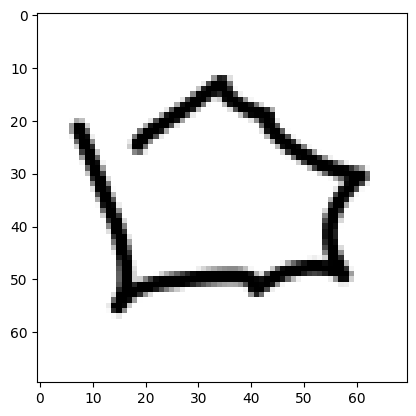

In [44]:
import matplotlib.pyplot as plt

sample_size = 5

random_idx = np.random.randint(25000, size = sample_size)

for idx in random_idx:
    img = train_images[idx, : ]
    # 정답값
    label = train_labels[idx]
    print(label)
    plt.figure()
    plt.imshow(img)

### 데이터 증강해보기

In [45]:
# train_images.shape

(21833, 70, 70, 4)

In [47]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # 이미지 데이터 생성기 생성
# datagen = ImageDataGenerator(
#     rotation_range=20,  # 이미지 회전 각도 범위
#     width_shift_range=0.1,  # 가로로 이동하는 범위
#     height_shift_range=0.1,  # 세로로 이동하는 범위
#     shear_range=0.2,  # 전단 강도 범위
#     zoom_range=0.2,  # 확대/축소 범위
#     horizontal_flip=True,  # 수평으로 뒤집기
#     vertical_flip=False  # 수직으로 뒤집기
# )

# # 증강된 이미지 데이터 생성
# augmented_train_images = datagen.flow(train_images, batch_size=32)
# # augmented_train_images = datagen.flow(train_images, train_labels, batch_size=32, color_mode='grayscale')


### 데이터 스케일링 (안하면 정확도가 낮게 나온다.?)

In [48]:
# 데이터 전처리
train_images = train_images / 255
test_images = test_images / 255

In [49]:
train_images.shape

(21833, 70, 70, 4)

###  이미지 데이터 1차원 형태로 변환

In [50]:
train_images = train_images.reshape(-1,70*70)
test_images = test_images.reshape(-1,70*70)

In [51]:
train_images.shape

(87332, 4900)

### 라벨 값 카테고리컬

In [52]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### model 1

In [98]:
## model 1
model1 = Sequential()
model1.add(Dense(128, input_shape=(4900,), activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(4, activation='softmax'))

model1.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['acc'])
model1.fit(train_images, train_labels, epochs=100, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/100
683/683 [==============================] - 3s 4ms/step - loss: 1.1892 - acc: 0.4736 - val_loss: 0.9796 - val_acc: 0.6171
Epoch 2/100
683/683 [==============================] - 3s 4ms/step - loss: 0.9738 - acc: 0.6049 - val_loss: 0.9227 - val_acc: 0.6639
Epoch 3/100
683/683 [==============================] - 3s 5ms/step - loss: 0.9027 - acc: 0.6498 - val_loss: 0.8835 - val_acc: 0.6626
Epoch 4/100
683/683 [==============================] - 3s 4ms/step - loss: 0.8471 - acc: 0.6755 - val_loss: 1.0202 - val_acc: 0.5844
Epoch 5/100
683/683 [==============================] - 3s 5ms/step - loss: 0.7827 - acc: 0.7011 - val_loss: 0.7863 - val_acc: 0.6913
Epoch 6/100
683/683 [==============================] - 3s 4ms/step - loss: 0.7333 - acc: 0.7188 - val_loss: 0.6716 - val_acc: 0.7468
Epoch 7/100
683/683 [==============================] - 3s 5ms/step - loss: 0.6828 - acc: 0.7435 - val_loss: 0.6775 - val_acc: 0.7362
Epoch 8/100
683/683 [==============================] - 3s 5ms/step - 

In [99]:
model1.evaluate(test_images, test_labels)

171/171 [==============================] - 1s 4ms/step - loss: 0.5268 - acc: 0.8280


[0.5267952680587769, 0.8279904723167419]

### model2

In [54]:
## model 1
model2 = Sequential()
model2.add(Dense(128, input_shape=(4900,), activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(4, activation='softmax'))

model2.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['acc'])
model2.fit(train_images, train_labels, epochs=80, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/80


ValueError: in user code:

    File "C:\Users\user\miniconda3\envs\meta\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\miniconda3\envs\meta\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\miniconda3\envs\meta\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\miniconda3\envs\meta\lib\site-packages\keras\engine\training.py", line 995, in train_step
        self._validate_target_and_loss(y, loss)
    File "C:\Users\user\miniconda3\envs\meta\lib\site-packages\keras\engine\training.py", line 950, in _validate_target_and_loss
        "Target data is missing. Your model was compiled with "

    ValueError: Target data is missing. Your model was compiled with loss=categorical_crossentropy, and therefore expects target data to be provided in `fit()`.


In [18]:
model2.evaluate(test_images, test_labels)

171/171 [==============================] - 0s 2ms/step - loss: 0.4992 - acc: 0.8450


[0.4991704821586609, 0.8450265526771545]

### model3

In [102]:
## model 1
model3 = Sequential()
model3.add(Dense(128, input_shape=(4900,), activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(4, activation='softmax'))

model3.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['acc'])
history = model2.fit(train_images, train_labels, epochs=100, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/100
683/683 [==============================] - 4s 5ms/step - loss: 1.2715 - acc: 0.4094 - val_loss: 1.1830 - val_acc: 0.4677
Epoch 2/100
683/683 [==============================] - 3s 5ms/step - loss: 1.0313 - acc: 0.5677 - val_loss: 1.0061 - val_acc: 0.5673
Epoch 3/100
683/683 [==============================] - 3s 4ms/step - loss: 0.9219 - acc: 0.6277 - val_loss: 0.9618 - val_acc: 0.6149
Epoch 4/100
683/683 [==============================] - 3s 5ms/step - loss: 0.8249 - acc: 0.6712 - val_loss: 0.7954 - val_acc: 0.6770
Epoch 5/100
683/683 [==============================] - 3s 5ms/step - loss: 0.7523 - acc: 0.6991 - val_loss: 0.7424 - val_acc: 0.7018
Epoch 6/100
683/683 [==============================] - 3s 4ms/step - loss: 0.7113 - acc: 0.7213 - val_loss: 0.6578 - val_acc: 0.7322
Epoch 7/100
683/683 [==============================] - 3s 5ms/step - loss: 0.6538 - acc: 0.7479 - val_loss: 0.6475 - val_acc: 0.7435
Epoch 8/100
683/683 [==============================] - 3s 5ms/step - 

In [104]:
model3.evaluate(test_images, test_labels)

171/171 [==============================] - 1s 4ms/step - loss: 0.4690 - acc: 0.8452


[0.46896645426750183, 0.8452097177505493]

In [103]:
history.history

{'loss': [1.2714816331863403,
  1.0313136577606201,
  0.9218869209289551,
  0.8249287605285645,
  0.7522669434547424,
  0.7112635374069214,
  0.6538363695144653,
  0.6349092721939087,
  0.6222156882286072,
  0.6044334769248962,
  0.5756686925888062,
  0.5515127778053284,
  0.5412918925285339,
  0.5274931192398071,
  0.5318990349769592,
  0.509474515914917,
  0.5032846331596375,
  0.5070584416389465,
  0.48821356892585754,
  0.4837113916873932,
  0.48035675287246704,
  0.4626676142215729,
  0.4859863221645355,
  0.4640706181526184,
  0.4591420888900757,
  0.4403485357761383,
  0.43814361095428467,
  0.44859951734542847,
  0.4384397566318512,
  0.4430099427700043,
  0.43169155716896057,
  0.42585742473602295,
  0.41483384370803833,
  0.41641393303871155,
  0.40846365690231323,
  0.41581904888153076,
  0.4214600920677185,
  0.40826117992401123,
  0.40614578127861023,
  0.40514054894447327,
  0.39707717299461365,
  0.3890205919742584,
  0.3827704191207886,
  0.38469818234443665,
  0.391800

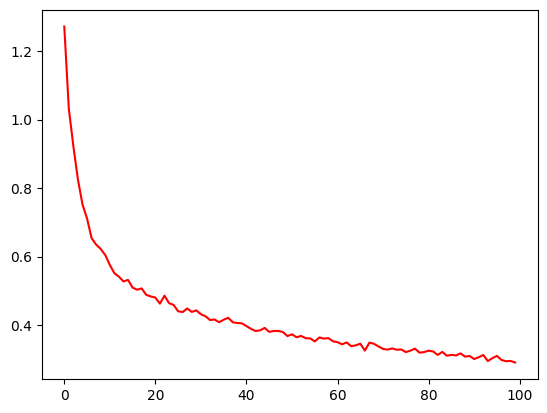

In [105]:
loss = history.history['loss']
plt.plot(range(len(loss)), loss, color = 'red', label = 'train_loss')

***

# 강사님이 구현한 손 그림 이미지 데이터 분류 모델

## 데이터 쉽게 가져오기 

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

# 업로드
ls -1ha kaggle.json

# 데이터 다운로드
!kaggle datasets download -d frobert/handdrawn-shapes-hds-dataset

!unzip handdrawn-shapes-hds-dataset.zip

In [ ]:
# 클래스 4개 지정후 그 폴더에서 데이터를 불러올때 정리하는 코드
import os
from distutils.dir_util import copy_tree

rootdir = './data'
folder_list = []
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        folder_list.append(d)

for temp in folder_list:
    for fname in ['ellipse','rectangle','triangle','other']:
        if os.path.isdir(temp+'/images/'+fname):
            copy_tree(temp+'/images/'+fname, './resource/'+fname)


### jpg 채널 : 3개, png 채널 : 4개(투명 처리 가능, 알파채널)

In [ ]:
import tensorflow as tf

# 이미지 데이터를 디렉토리에서 불러와서 알아서 정해주는 함수 

train_ds = tf.keras.utils.image_dataset_from_directory(
  './resource',
  color_mode='grayscale', # 알아서 4채널을 3채널로 바꿔준다.(흑백)
  validation_split=0.2, # 8대2로 
  subset="training", # 학습데이터 
  seed=123, # 랜덤 시드 123 위 실습은 100으로 설정
  label_mode = 'categorical', # 분류 이기에 categorical
  image_size=(70, 70), # 70, 70 픽셀의 이미지로 가져온다.
  batch_size=32) # Train 32개의 이미지와 32개의 정답값 데이터가 묶여서 나온다.
# Train_ds : 80%

val_ds = tf.keras.utils.image_dataset_from_directory(
  './resource',
  color_mode='grayscale',
  validation_split=0.2,
  label_mode = 'categorical',
  subset="validation", 
  seed=123, # 시드 값은 위의 Train과 똑같이 줘야 데이터가 안섞인다.
  image_size=(70, 70),
  batch_size=32)# Test 32개의 이미지와 32개의 정답값 데이터가 묶여서 나온다.
# val_ds : 20%

In [ ]:
train_ds.class_names

In [ ]:
# image_batch : X, labels_batch : y
# (32,70,70,1) => 32는 배치 사이즈, 70,70픽셀 , 그레이스케일해서1로 바뀐다. 
# 첫번째 배치의 첫번째 이미지는 사각형이 구나를 알수 있음.
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch)
    break

In [ ]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Sequential


model = Sequential()
# 모든 픽셀이 한 파처이기 때문에 모든 픽셀을 다 지정해줘야 한다.
model.add(Flatten(input_shape=(70,70)))
model.add(Dense(4900*2,activation='relu'))
model.add(Dense(3000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(40,activation='relu'))

# 분류일때 마지막 활성화함수는 softmax를 써야한다.
model.add(Dense(4,activation='softmax'))

In [1]:
model.summary()

NameError: name 'model' is not defined

In [ ]:
image_batch, labels_batch = next(iter(train_ds))
labels_batch.shape

In [ ]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['acc'] )
model.fit(train_ds,epochs=10)

# loss 그래프가 이상하게 나오면 learning rate 값을 변경해주거나 신경망을 다시 변경해서 쌓아야한다.

In [ ]:
model.evaluate(val_ds)